<a href="https://colab.research.google.com/github/davidclizbe/datascience/blob/master/ClizbAnalyzingModelPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score



#KNeighborsClassifier
#LogisticRegressionClassifier
#RandomForestClassifier

Load the training data into a dataframe named df_train_data 

In [ ]:
data= pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.tst', header= None, sep= ' ')

data.head()

,0,1,2,3,4,5,6,7,8,9
0,55,0,81,0,-6,11,25,88,64,4
1,56,0,96,0,52,-4,40,44,4,4
2,50,-1,89,-7,50,0,39,40,2,1
3,53,9,79,0,42,-2,25,37,12,4
4,55,2,82,0,54,-6,26,28,2,1


In [ ]:
data.columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'target']
data.head()

,a,b,c,d,e,f,g,h,i,target
0,55,0,81,0,-6,11,25,88,64,4
1,56,0,96,0,52,-4,40,44,4,4
2,50,-1,89,-7,50,0,39,40,2,1
3,53,9,79,0,42,-2,25,37,12,4
4,55,2,82,0,54,-6,26,28,2,1


In [ ]:
### let's drop the minor classes or just to 1 vs rest 
data['target'] =data.target.apply(lambda x: 1 if x ==1 else 0 )

Create binary classification problem - rename some class labels

In [ ]:
data.target.unique() 

array([0, 1])

(array([ 3022.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11478.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

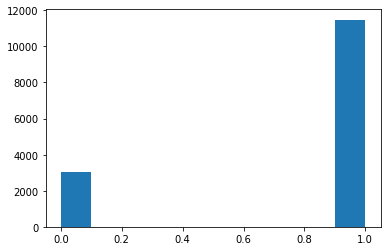

In [ ]:
plt.hist(data.target)

Create a dataframe of 9 features named X, drop column 9.

In [ ]:
X= data.drop(['target'], axis= 1)
X.head()

,a,b,c,d,e,f,g,h,i
0,55,0,81,0,-6,11,25,88,64
1,56,0,96,0,52,-4,40,44,4
2,50,-1,89,-7,50,0,39,40,2
3,53,9,79,0,42,-2,25,37,12
4,55,2,82,0,54,-6,26,28,2


Create a data frame of labels named y, select only column 9.

In [ ]:
y= data['target']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: target, dtype: int64

Split the data into a training set and a test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train.head()

,a,b,c,d,e,f,g,h,i
4778,51,0,78,-2,50,-8,27,29,2
4676,39,0,81,-1,38,0,42,43,0
14460,49,0,84,0,50,23,35,35,0
11617,42,-2,84,-7,42,0,42,43,0
12637,81,0,84,0,-18,22,4,103,98


In [ ]:
y_train.head()

4778     1
4676     1
14460    1
11617    1
12637    0
Name: target, dtype: int64

In [ ]:
X_test.head()

,a,b,c,d,e,f,g,h,i
644,44,1,84,0,42,-24,41,43,2
13086,41,2,80,0,42,4,39,39,0
14403,49,0,79,0,46,-19,31,33,2
9410,37,0,93,0,12,29,56,81,24
9714,45,0,81,0,44,-28,36,37,2


In [ ]:
y_test.head()

644      1
13086    1
14403    1
9410     1
9714     1
Name: target, dtype: int64

Instantiate a Logistic Regression classifier with a lbfgs solver.

In [ ]:
clf = LogisticRegression(random_state=0,).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
clf.classes_

array([0, 1])

Fit the classifier to the data.

In [ ]:
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.7875862068965517

Calculate and print the accuracy of the model on the test data.

In [ ]:
clf.score(X_train, y_train)

0.9337068965517241

In [ ]:
clf.score(X_test, y_test)

0.9334482758620689

Use the dummy classifier to calculate the accuracy of a purely random chance.

Compare this result to the result of the logistic regression classifier above. What does this result tell you?

In [ ]:
y_pred = clf.predict(X_test)

Print the confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 473,  143],
       [  50, 2234]])

Use the plot_confusion_matrix function from above to plot a nicer looking confusion matrix.

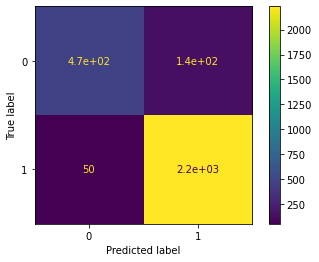

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

Print the F1, F beta, precision, recall and accuracy scores.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fbeta_precision = fbeta_score(y_test, y_pred, 0.5)
fbeta_recall = fbeta_score(y_test, y_pred, 2)

In [ ]:
print('Accuracy score: {:.2f}'.format(accuracy))


Accuracy score: 0.93


In [ ]:
print('precision', precision) 

precision 0.9398401346234749


In [ ]:
print('Recall score:', recall)  


Recall score: 0.978108581436077


In [ ]:
print('F1 score', f1)

F1 score 0.9585925767002789


In [ ]:
print('Fbeta score favoring precision', fbeta_precision) 

Fbeta score favoring precision 0.9472523744911803


In [ ]:
print('FBeta score favoring recall', fbeta_recall)

FBeta score favoring recall 0.9702075914183964


 Print a classification report

In [ ]:
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       616
           1       0.94      0.98      0.96      2284

    accuracy                           0.93      2900
   macro avg       0.92      0.87      0.89      2900
weighted avg       0.93      0.93      0.93      2900



Plot ROC Curve and AUC

In [ ]:
# from sklearn.metrics import roc_auc_score

# def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

#   #creating a set of all the unique classes using the actual class list
#   unique_class = set(actual_class)
#   roc_auc_dict = {}
#   for per_class in unique_class:
#     #creating a list of all the classes except the current class 
#     other_class = [x for x in unique_class if x != per_class]

#     #marking the current class as 1 and all other classes as 0
#     new_actual_class = [0 if x in other_class else 1 for x in actual_class]
#     new_pred_class = [0 if x in other_class else 1 for x in pred_class]

#     #using the sklearn metrics method to calculate the roc_auc_score
#     roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
#     roc_auc_dict[per_class] = roc_auc

#   return roc_auc_dict

# print("\nLogistic Regression")
# lr_roc_auc_multiclass = roc_auc_score_multiclass(y_test, y_pred)
# print(lr_roc_auc_multiclass)

In [ ]:
 roc_auc_score(np.array(y_test), np.array(y_pred))

0.8729828621466099

In [ ]:

# from sklearn.metrics import roc_curve, auc 

# y_pred_proba=clf.predict_proba(X_test)
# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# n_classes= 6 ## since in y_test we only have 6 classes  
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Plot of a ROC curve for a specific class
# for i in range(n_classes):
#     print('for class', i+1)
#     plt.figure()
#     plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver operating characteristic example')
#     plt.legend(loc="lower right")
#     plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc 

fpr = dict()
tpr = dict()
roc_auc = dict()
y_pred_proba=clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test,   y_pred_proba[:, 1]  )
roc_auc = auc(fpr, tpr)

In [ ]:
roc_auc

0.9753806832397025

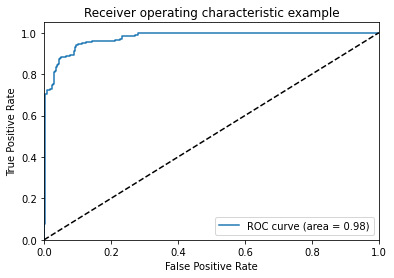

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Plot the precision-recall curve for the model above.

Find the best value for C in the Logistic Regression Classifier for avoiding overfitting. Plot the training and testing accuracy over a range of C values from 0.05 to 1.5.

In [ ]:
import warnings
warnings.filterwarnings("ignore")  

#Grid Search
from sklearn.model_selection import GridSearchCV
clf_gs = LogisticRegression( random_state=53)
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf_gs, param_grid = grid_values,scoring = 'accuracy')
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

Accuracy Score : 0.963103448275862
Precision Score : 0.9661670235546038
Recall Score : 0.9877408056042032
F1 Score : 0.9768348127300281


array([[ 537,   79],
       [  28, 2256]])

Perform 5-fold cross validation for a Logistic Regression Classifier. Print the 5 accuracy scores and the mean validation score.

Our linear classifier is not giving us accuracy better than the dummy classifier. Suppose that the data was not linearly separable? Instantiate and train a KNN model with k = 7. How does the accuracy of the KNN model compare to the Logistic Regression from above? What does that tell you about the data?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.9982758620689656

Next, instantiate and fit a RandomForestClassifier and calculate the accuracy of that model.

 

Now, some additional questions about analyzing model performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9955172413793103